<a href="https://colab.research.google.com/github/seanb7/GEOL-450/blob/main/(Mogi(1958)_style_elastic_analytical_solution)_GEO450_EX2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Define both Shear Modulus and Bulk Modulus including how each describes the material properties of a rock.
#2. What is the effect of increased temperature on the displacement oat the surface due to pressurizing magma chamber
#3. What would you expect to see in a natural system that may have more varuing temperature?


In [3]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from matplotlib import cm
import copy

In [11]:
# Step 1, define initil parameters

# Poisson's Ratio
nu = 0.25

# Tempuratures, degC
Temp = np. array([0,100,200,300,400,500,600,700,800,900])

# Young's Modulus, GPa
E = np.array([30,29.25,29.4,29,29.4,29.25,12.0,11.25,10,7.5])*1e9

# Shear Modulus, Pa
mu = E/(2*(1+nu))

# Bulk Modulus, Pa
k = E/(3*(1-2*nu))

# Magma Chamber Radius, m
r = 500

# Depth to magma chamber, m
d = 4*1e3

# Spatial Location of magma chamber, m
x0 = 0
y0 = 0

# Magma Chamber pressure change, Pa
dP = 50e6

#Horizontal distance form model center
# for a 2D model x vs. z
x = np.arange (0,401)/4*1e3

In [12]:
# Now calculate surface deformation using Mofgi's Formulation

# Loading term
B = (r**3) * dP * (1-nu) / mu

# Size information for the vectors
nn = np.size(x)
m = np.size(B)

# Set up an aray for U
Ux = np.ones([m,nn])
Uz = np.ones([m,nn])

# Displacements in the X and Z direction
i = 0
for elem in B:
    Ux[i,:] = elem * (x-x0) / ((d**2 + x**2)**(3/2))
    Uz[i,:] = elem * d / ((d**2 + x**2)**(3/2))
    i = i+1

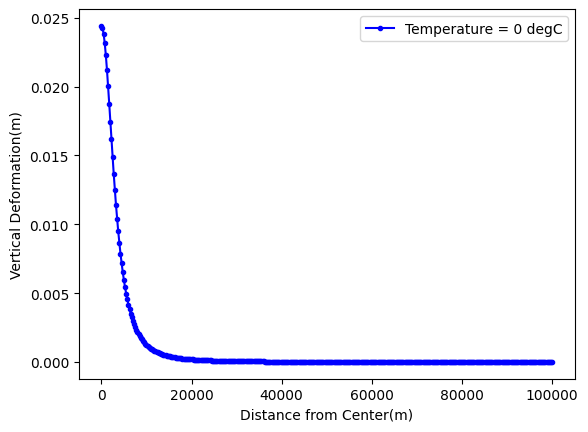

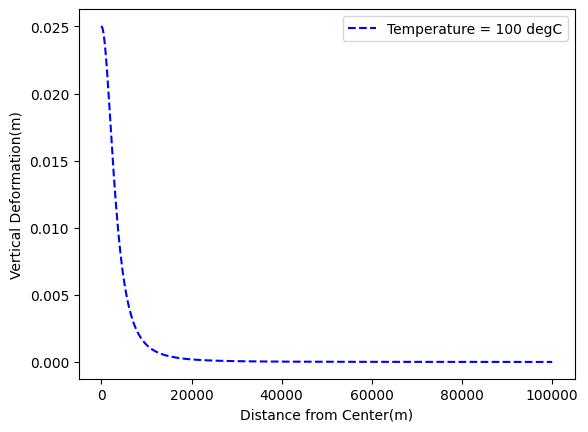

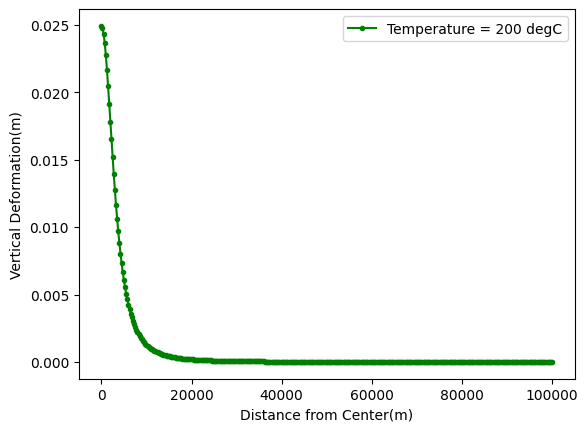

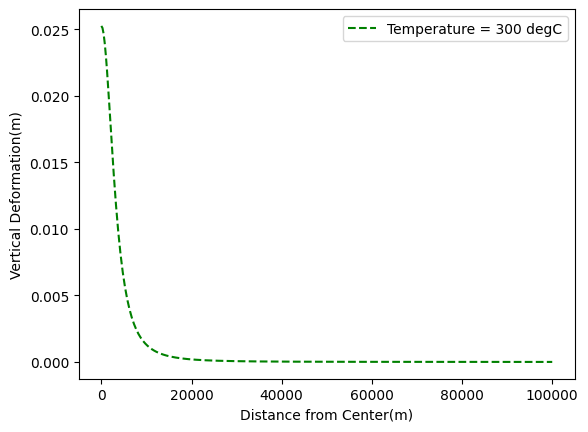

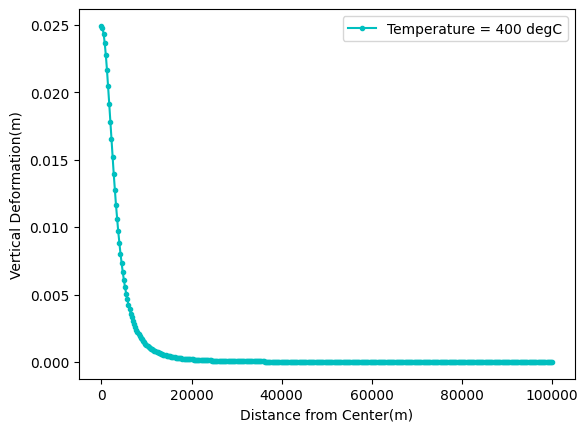

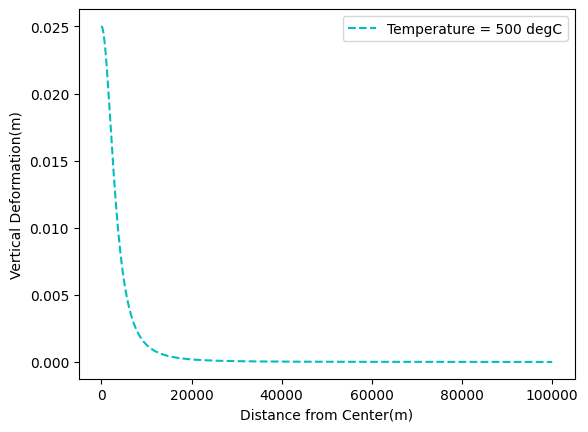

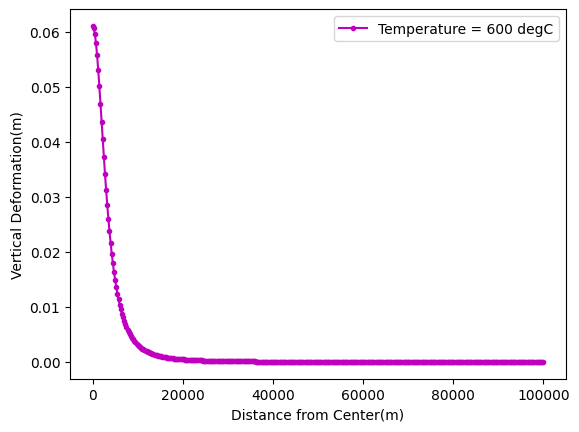

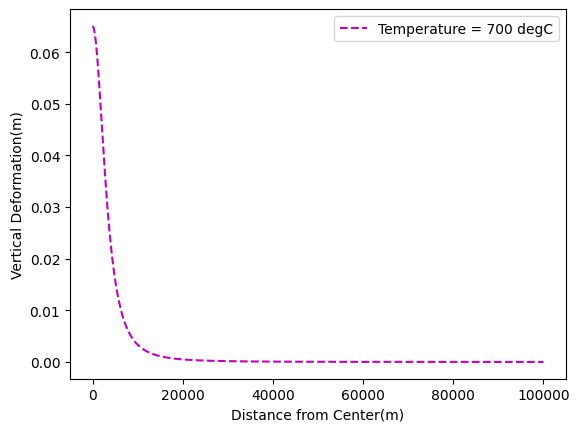

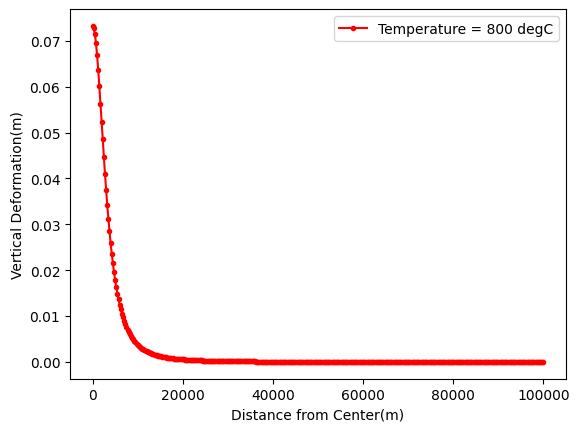

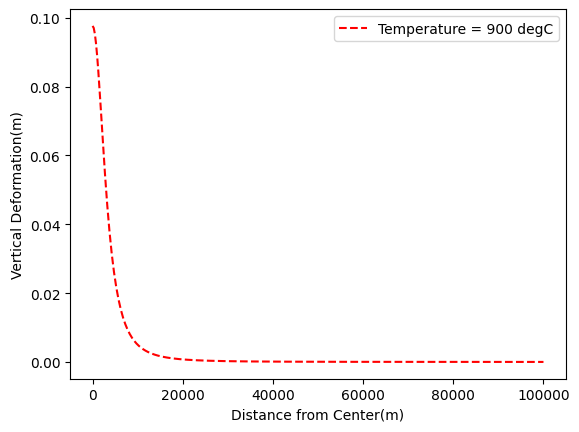

<Figure size 640x480 with 0 Axes>

In [16]:
# Plot the Veritcal Model  Calculation
line = ['b.-','b--','g.-','g--','c.-','c--','m.-','m--','r.-','r--']

i = 0
for elem in Temp:
    plt.plot(x,Uz[i,:],line[i], label = "Temperature = {} degC".format(Temp[i]))
    plt.xlabel('Distance from Center(m)')
    plt.ylabel('Vertical Deformation(m)')
    plt.legend()
    plt.show()
    i = i+1
    plt.savefig('Vertical_Deformation_Ex2.png')

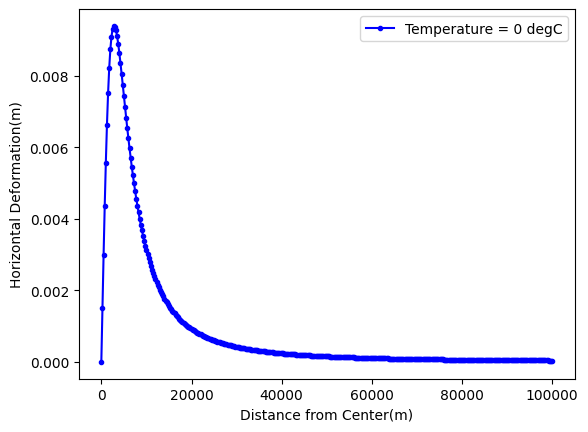

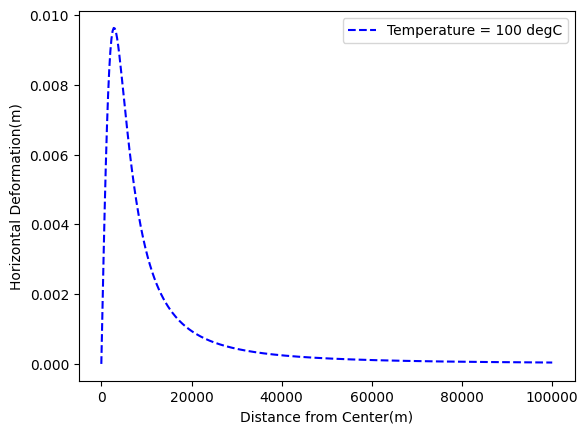

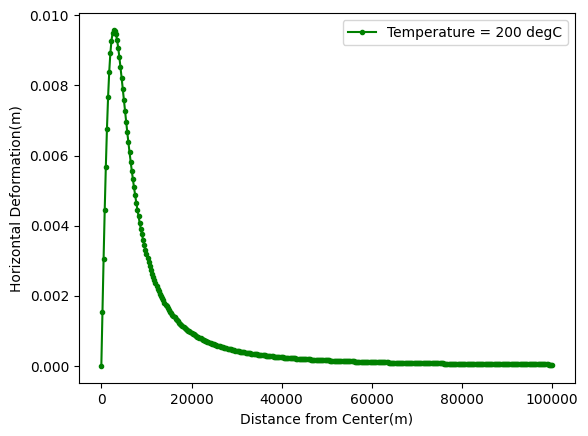

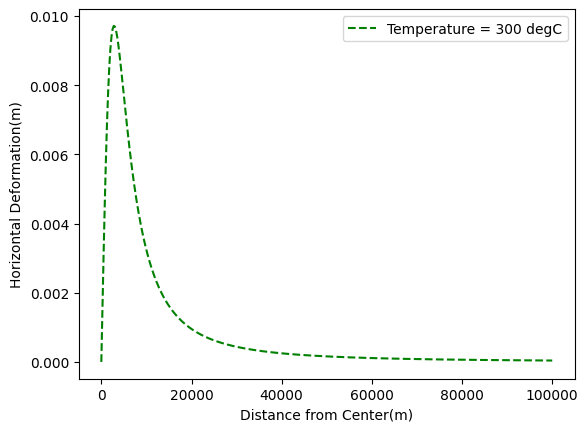

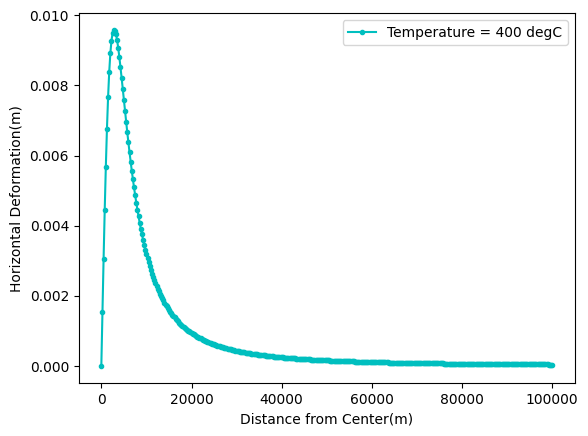

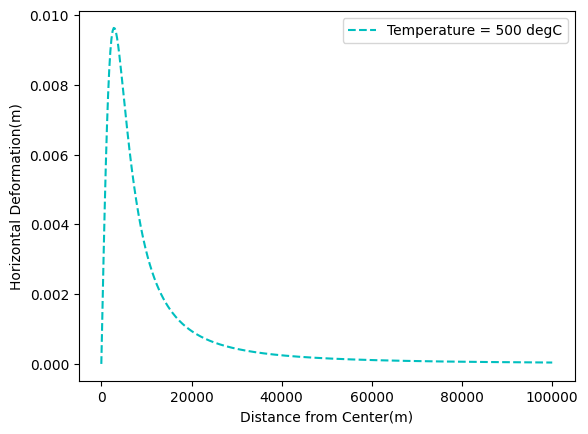

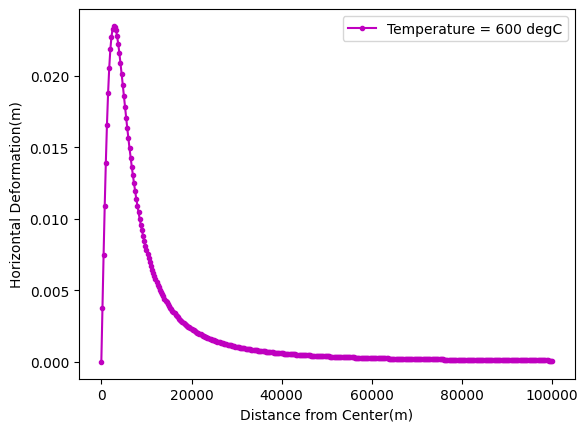

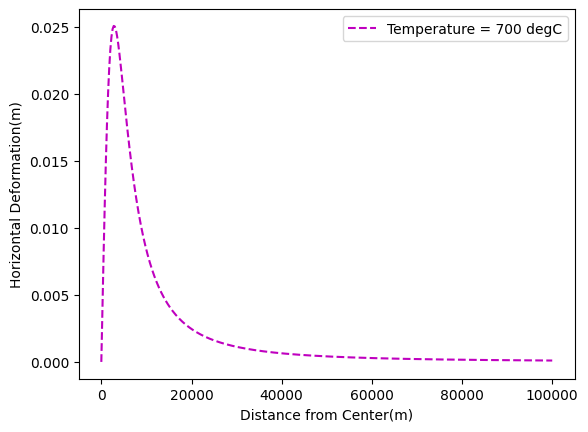

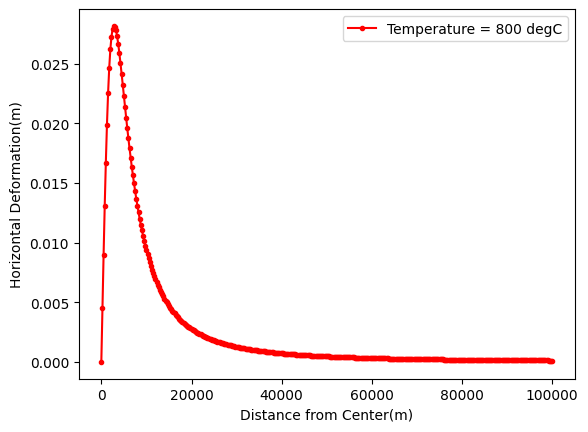

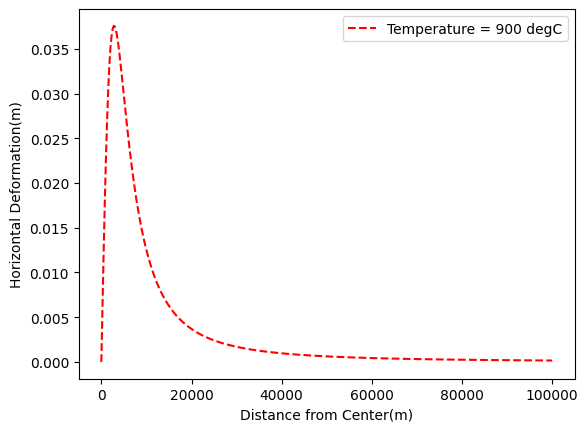

<Figure size 640x480 with 0 Axes>

In [17]:
# Plot the Horizontal Model  Calculation
i = 0
for elem in Temp:
    plt.plot(x,Ux[i,:],line[i], label = "Temperature = {} degC".format(Temp[i]))
    plt.xlabel('Distance from Center(m)')
    plt.ylabel('Horizontal Deformation(m)')
    plt.legend()
    plt.show()
    i = i+1
    plt.savefig('Horizontal_Deformation_Ex2.png')